In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [80]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)

# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
#from sklearn import ensemble
#from sklearn.model_selection import cross_val_score

#rfc = ensemble.RandomForestClassifier()
#X = y2015.drop('loan_status', 1)
#Y = y2015['loan_status']
#X = pd.get_dummies(X)
#X = X.dropna(axis=1)

#cross_val_score(rfc, X, Y, cv=10)

array([ 0.99995251,  1.        ,  0.99997625,  1.        ,  1.        ,
        1.        ,  1.        ,  0.99990501,  0.99992875,  0.99992875])

In [55]:
# My attempt at PCA from Unit 2, lesson 1
from sklearn.preprocessing import StandardScaler
YX = X.drop([  'issue_d_Apr-2015',
 'issue_d_Aug-2015', 'issue_d_Dec-2015', 'issue_d_Feb-2015',
 'issue_d_Jan-2015', 'issue_d_Jul-2015', 'issue_d_Jun-2015',
 'issue_d_Mar-2015', 'issue_d_May-2015', 'issue_d_Nov-2015', 'issue_d_Oct-2015',
 'issue_d_Sep-2015','title_Business',
 'title_Car financing', 'title_Credit Card/Auto Repair', 'title_Credit card refinancing', 'title_Debt consolidation',
 'title_DebtC', 'title_Green loan', 'title_Home buying', 'title_Home improvement', 'title_Learning and training',
 'title_Major purchase', 'title_Medical expenses', 'title_Moving and relocation', 'title_New Baby and New House (CC Consolidate)',
 'title_Other', 'title_Pay off Lowes Card', 'title_Paying off higher interest cards & auto',
 'title_Prescription Drug and Medical Costs', 'title_SAVE', 'title_Simple Loan Until Contract Is Completed',
 'title_Student Loan', 'title_Trying to come back to reality!', 'title_Vacation',
 'title_considerate', 'title_new day', 'title_new kitchen for momma!', 'title_odymeds','last_pymnt_d_Apr-2015',
 'last_pymnt_d_Apr-2016', 'last_pymnt_d_Aug-2015', 'last_pymnt_d_Aug-2016', 'last_pymnt_d_Dec-2015', 'last_pymnt_d_Dec-2016',
 'last_pymnt_d_Feb-2015', 'last_pymnt_d_Feb-2016', 'last_pymnt_d_Jan-2015', 'last_pymnt_d_Jan-2016',
 'last_pymnt_d_Jan-2017', 'last_pymnt_d_Jul-2015', 'last_pymnt_d_Jul-2016', 'last_pymnt_d_Jun-2015', 'last_pymnt_d_Jun-2016', 'last_pymnt_d_Mar-2015', 'last_pymnt_d_Mar-2016',
 'last_pymnt_d_May-2015', 'last_pymnt_d_May-2016', 'last_pymnt_d_Nov-2015', 'last_pymnt_d_Nov-2016', 'last_pymnt_d_Oct-2015',
 'last_pymnt_d_Oct-2016', 'last_pymnt_d_Sep-2015', 'last_pymnt_d_Sep-2016', 'next_pymnt_d_Feb-2017',
 'next_pymnt_d_Jan-2017', 'next_pymnt_d_Jul-2016', 'next_pymnt_d_Mar-2017', 'last_credit_pull_d_Apr-2015',
 'last_credit_pull_d_Apr-2016', 'last_credit_pull_d_Aug-2015', 'last_credit_pull_d_Aug-2016', 'last_credit_pull_d_Dec-2014',
 'last_credit_pull_d_Dec-2015', 'last_credit_pull_d_Dec-2016', 'last_credit_pull_d_Feb-2015', 'last_credit_pull_d_Feb-2016',
 'last_credit_pull_d_Jan-2015', 'last_credit_pull_d_Jan-2016', 'last_credit_pull_d_Jan-2017', 'last_credit_pull_d_Jul-2015',
 'last_credit_pull_d_Jul-2016', 'last_credit_pull_d_Jun-2015', 'last_credit_pull_d_Jun-2016', 'last_credit_pull_d_Mar-2015',
 'last_credit_pull_d_Mar-2016', 'last_credit_pull_d_May-2015', 'last_credit_pull_d_May-2016', 'last_credit_pull_d_Nov-2015'],1)
#YX.head()


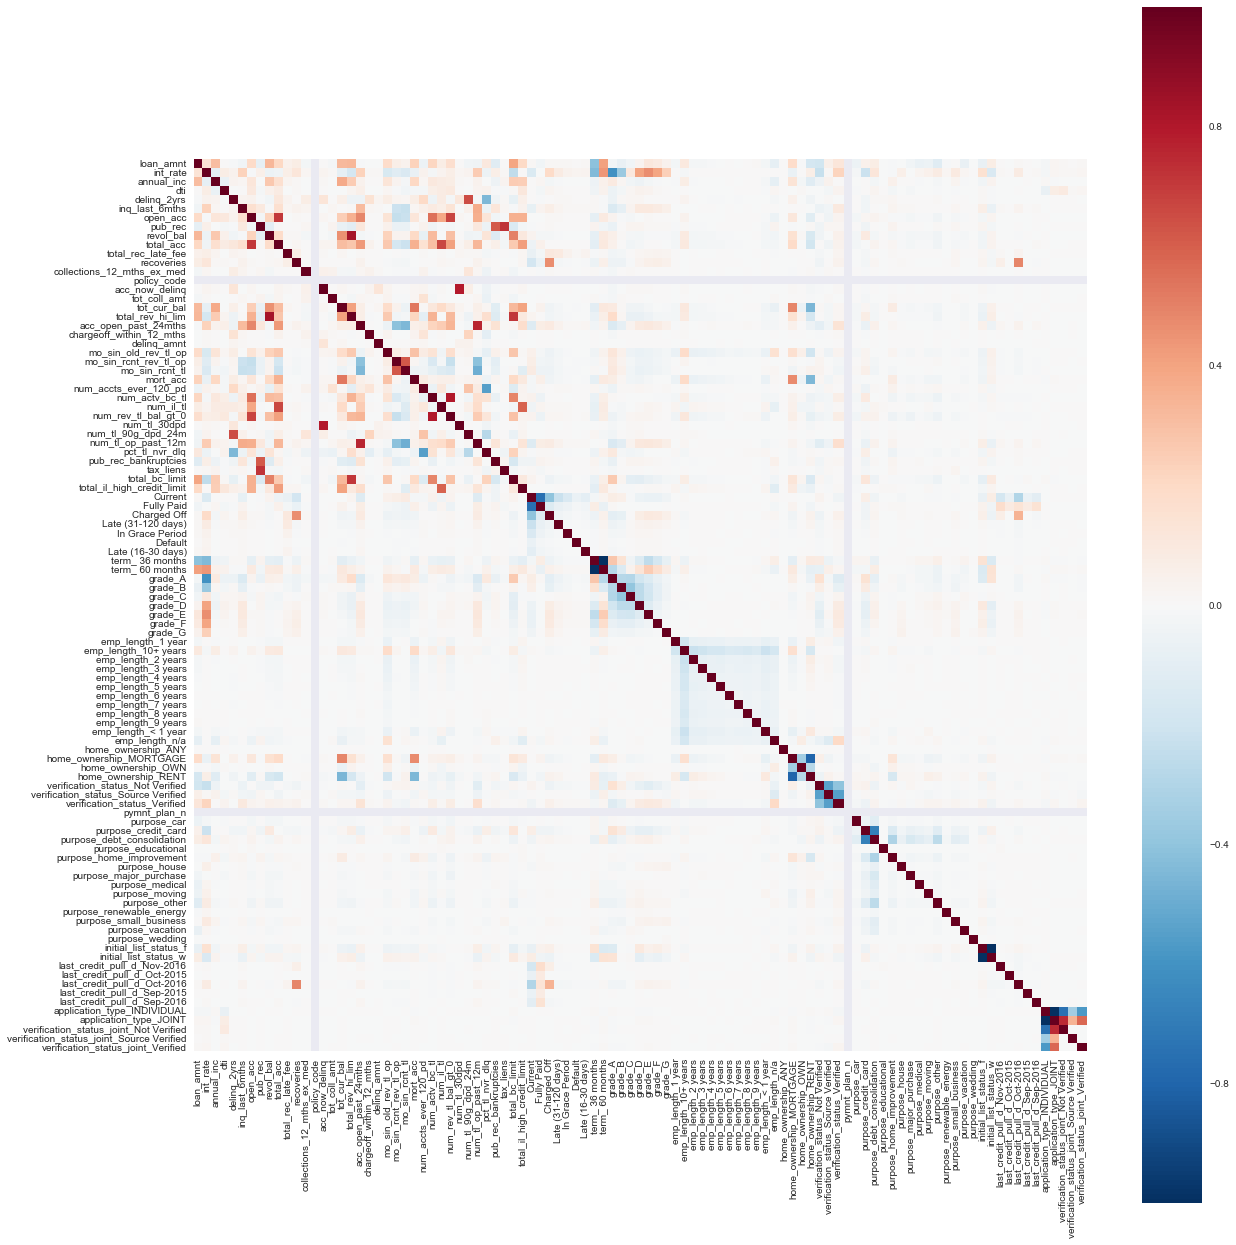

In [48]:
corrmat = YX.corr() 
f, ax = plt.subplots(figsize=(20, 22))
# Draw the heatmap using seaborn to see what is correlated 
sns.heatmap(corrmat, vmax=.8, square=True,annot=False,fmt='.2f')
plt.show()

In [49]:
SSX = StandardScaler().fit_transform(YX)

In [53]:
from matplotlib.mlab import PCA as mlabPCA
from sklearn.decomposition import PCA 

sklearn_pca = PCA()
Y_sklearn = sklearn_pca.fit_transform(SSX)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)



The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [  5.53071764e-02   4.27799477e-02   3.17360202e-02   3.04194785e-02
   2.86341644e-02   2.35667893e-02   2.19092466e-02   2.17379440e-02
   1.95991096e-02   1.84026304e-02   1.81686793e-02   1.76192605e-02
   1.70405801e-02   1.63360189e-02   1.50806312e-02   1.41690327e-02
   1.38140478e-02   1.32395562e-02   1.26851369e-02   1.25674221e-02
   1.21043227e-02   1.18461369e-02   1.16055875e-02   1.13980271e-02
   1.12715351e-02   1.12243441e-02   1.11095408e-02   1.10590701e-02
   1.09635193e-02   1.09340066e-02   1.08512085e-02   1.07853066e-02
   1.07547519e-02   1.07412146e-02   1.07052709e-02   1.06676698e-02
   1.05667525e-02   1.05548833e-02   1.05093095e-02   1.04895367e-02
   1.04499333e-02   1.04304967e-02   1.03937697e-02   1.03682645e-02
   1.03582829e-02   1.03407189e-02   1.03234861e-02   1.03191996e-02
   1.02982396e-02   1.02903193e-02   1.02847722e-02   1.02697343e-02
   1.024

In [81]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
X = X.drop(['purpose','title'],1)
X = pd.get_dummies(X)

X = X.drop(['loan_amnt','tot_cur_bal','delinq_amnt','acc_now_delinq',
 'tot_coll_amt', 'tot_cur_bal','id','member_id','funded_amnt','funded_amnt_inv','installment','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_amnt','issue_d_Apr-2015',
 'issue_d_Aug-2015', 'issue_d_Dec-2015', 'issue_d_Feb-2015', 'issue_d_Jan-2015',
 'issue_d_Jul-2015', 'issue_d_Jun-2015', 'issue_d_Mar-2015', 'issue_d_May-2015',
 'issue_d_Nov-2015', 'issue_d_Oct-2015', 'issue_d_Sep-2015','last_pymnt_d_Apr-2015',
 'last_pymnt_d_Apr-2016', 'last_pymnt_d_Aug-2015', 'last_pymnt_d_Aug-2016', 'last_pymnt_d_Dec-2015', 'last_pymnt_d_Dec-2016', 'last_pymnt_d_Feb-2015',
 'last_pymnt_d_Feb-2016', 'last_pymnt_d_Jan-2015', 'last_pymnt_d_Jan-2016', 'last_pymnt_d_Jan-2017',
 'last_pymnt_d_Jul-2015', 'last_pymnt_d_Jul-2016', 'last_pymnt_d_Jun-2015', 'last_pymnt_d_Jun-2016', 'last_pymnt_d_Mar-2015', 'last_pymnt_d_Mar-2016',
 'last_pymnt_d_May-2015', 'last_pymnt_d_May-2016', 'last_pymnt_d_Nov-2015',
 'last_pymnt_d_Nov-2016', 'last_pymnt_d_Oct-2015', 'last_pymnt_d_Oct-2016', 'last_pymnt_d_Sep-2015',
 'last_pymnt_d_Sep-2016', 'next_pymnt_d_Feb-2017', 'next_pymnt_d_Jan-2017', 'next_pymnt_d_Jul-2016',
 'next_pymnt_d_Mar-2017', 'last_credit_pull_d_Apr-2015', 'last_credit_pull_d_Apr-2016', 'last_credit_pull_d_Aug-2015',
 'last_credit_pull_d_Aug-2016', 'last_credit_pull_d_Dec-2014', 'last_credit_pull_d_Dec-2015',
 'last_credit_pull_d_Dec-2016', 'last_credit_pull_d_Feb-2015', 'last_credit_pull_d_Feb-2016',
 'last_credit_pull_d_Jan-2015', 'last_credit_pull_d_Jan-2016', 'last_credit_pull_d_Jan-2017', 'last_credit_pull_d_Jul-2015',
 'last_credit_pull_d_Jul-2016', 'last_credit_pull_d_Jun-2015', 'last_credit_pull_d_Jun-2016', 'last_credit_pull_d_Mar-2015',
 'last_credit_pull_d_Mar-2016', 'last_credit_pull_d_May-2015', 'last_credit_pull_d_May-2016', 'last_credit_pull_d_Nov-2015',
 'last_credit_pull_d_Nov-2016', 'last_credit_pull_d_Oct-2015', 'last_credit_pull_d_Oct-2016', 'last_credit_pull_d_Sep-2015',
 'last_credit_pull_d_Sep-2016'],1)

Y = y2015['loan_status']

X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([ 0.90278075,  0.9053454 ,  0.90572534,  0.91075966,  0.91258608,
        0.91306103,  0.9138189 ,  0.91510128,  0.91683093,  0.9173277 ])

X = X.drop(['num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
 'num_op_rev_tl', 'num_rev_tl_bal_gt_0','grade_G','verification_status_Verified','verification_status_joint_Verified','total_bal_ex_mort',
 'total_bc_limit', 'total_il_high_credit_limit','term_ 60 months', 'initial_list_status_w',
 'application_type_INDIVIDUAL','home_ownership_ANY','out_prncp',
 'out_prncp_inv'],1)


In [82]:
list(X)

['int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'policy_code',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'chargeoff_within_12_mths',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'term_ 36 months',
 'term_ 60 months',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'emp_length_1 year',
 'emp_length_10+ years',
 'emp_length_2 years',
 'emp_len

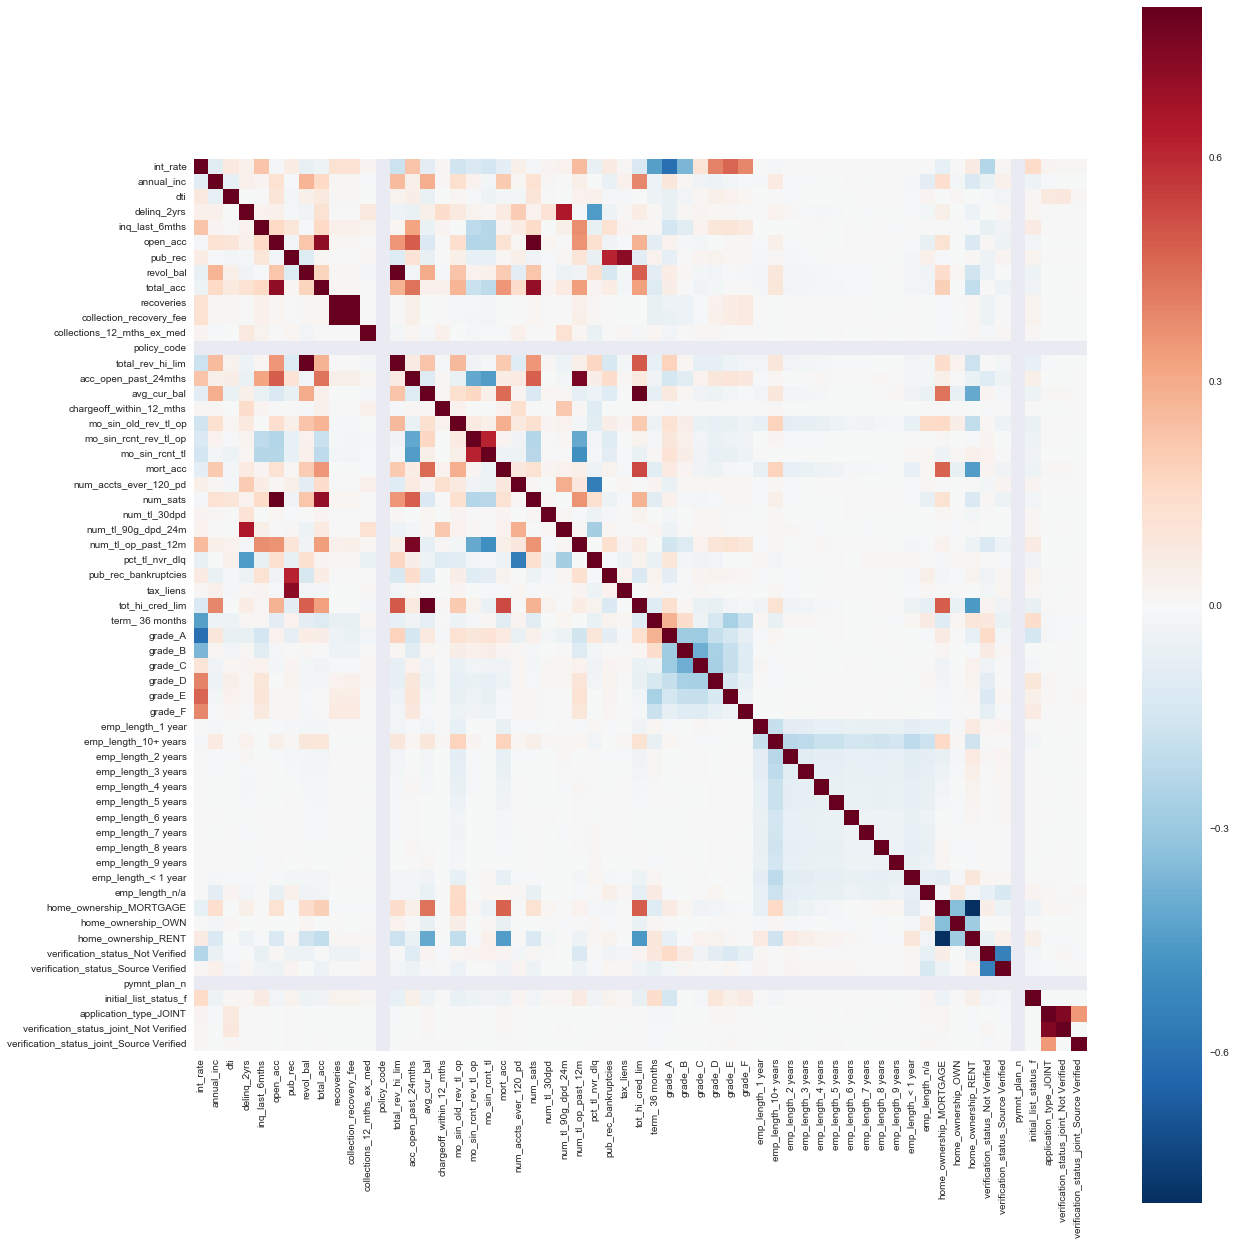

In [79]:
corrmat = X.corr() 
f, ax = plt.subplots(figsize=(20, 22))
# Draw the heatmap using seaborn to see what is correlated 
sns.heatmap(corrmat, vmax=.8, square=True,annot=False,fmt='.2f')
plt.show()